In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
api = wandb.Api()

In [ ]:
project = 'tiny_stories_saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    expansion_factor = run.config.get("expansion_factor", None)
    l1_coef = run.config.get("l1_coefficient", None)
    final_l0_norm = run.summary.get("metrics/l0", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    data.append({
        'expansion_factor': expansion_factor,
        'l1_coef': l1_coef,
        "l0_norm": final_l0_norm,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score
    })

df = pd.DataFrame(data)
print(df)

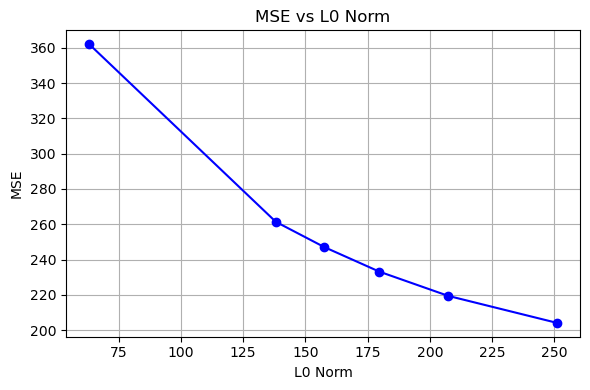

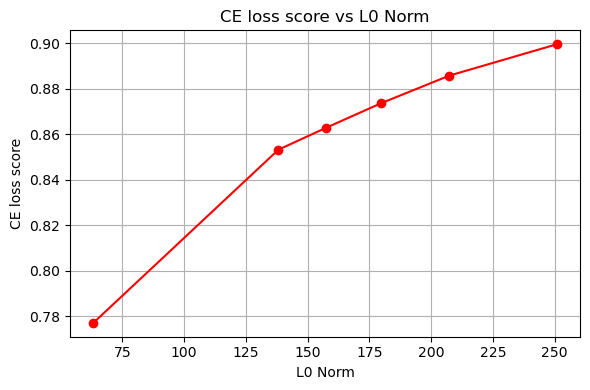

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 4))
# Plot 1: MSE vs L0 norm
ax1.plot(df['l0_norm'], df['mse'], marker='o', linestyle='-', color='b')
ax1.set_title('MSE vs L0 Norm')
ax1.set_xlabel('L0 Norm')
ax1.set_ylabel('MSE')
ax1.grid(True)
plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
# Plot 2: CE loss score vs L0 norm
ax2.plot(df['l0_norm'], df['ce_loss_score'], marker='o', linestyle='-', color='r')
ax2.set_title('CE loss score vs L0 Norm')
ax2.set_xlabel('L0 Norm')
ax2.set_ylabel('CE loss score')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [5]:
project = 'gpt2small-mlp-out-saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    # architecture = run.config.get("architecture", None)
    # if architecture == 'standard': 
    #     continue
    k = run.config.get("activation_fn_kwargs", None)['k']
    if k != 32:
        continue
    expansion_factor = run.config.get("expansion_factor", None)
    layer = run.config.get("hook_layer", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    num_dead = run.summary.get("sparsity/dead_features", None)

    data.append({
        'layer': layer,
        'expansion_factor': expansion_factor,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score,
        "num_dead": num_dead
    })

In [6]:
df = pd.DataFrame(data)
print(df)

    layer  expansion_factor         mse  ce_loss_score  num_dead
0       0                16   57.346352       0.995902       241
1       1                16  156.833252       0.839116         1
2       2                16   91.264572       0.764315         7
3       3                16  238.887115       0.784093         0
4       4                16  277.444824       0.744750         0
5       5                16  285.622131       0.769912         1
6       6                16  288.942017       0.754338         1
7       7                16  282.100220       0.722559         1
8       8                16  280.825867       0.744563         2
9       9                16  243.299316       0.729192         4
10     10                16  116.060074       0.702136        93
11     11                16  111.040291       0.699423        17


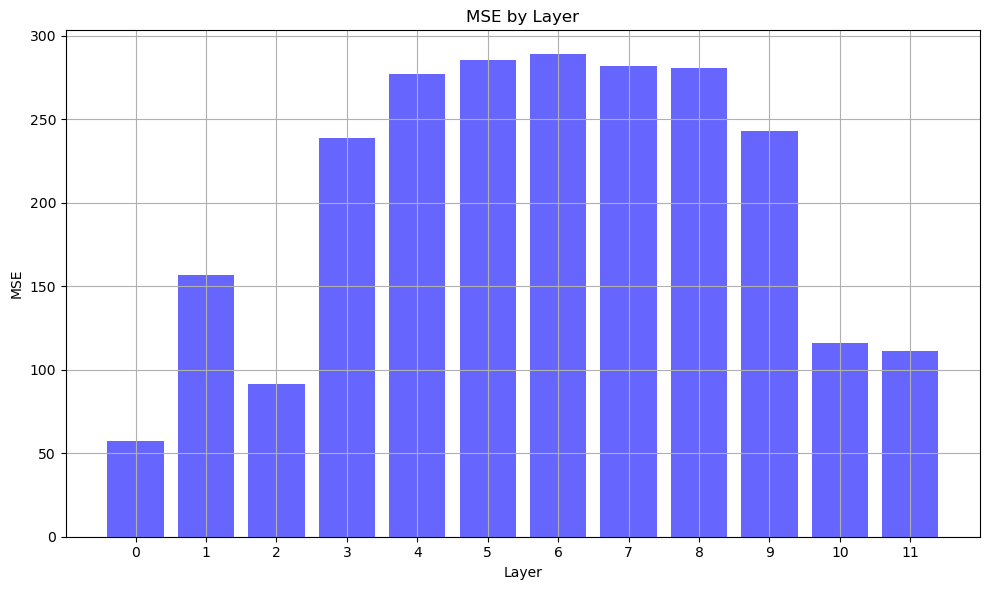

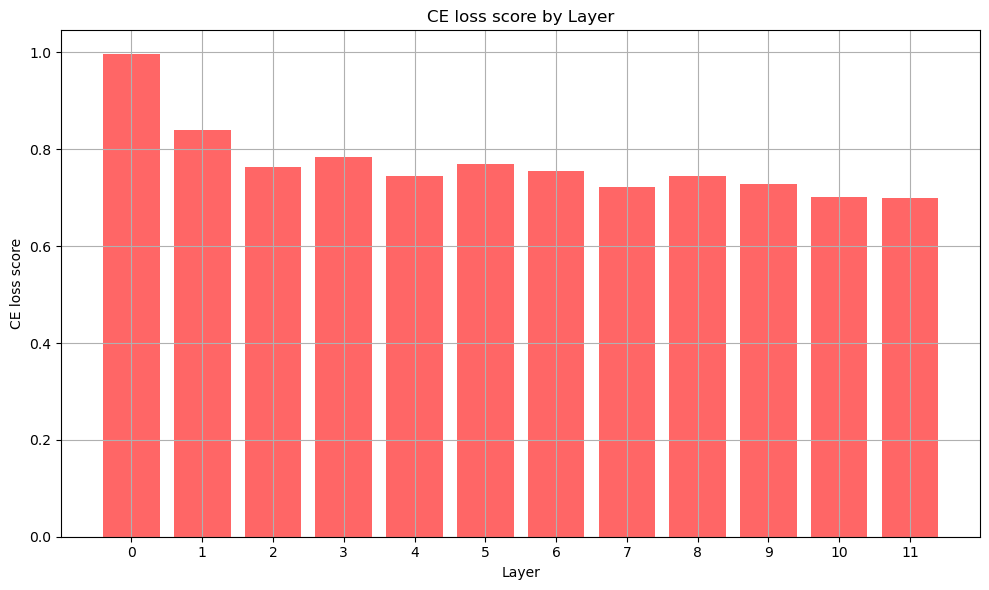

In [15]:
# Plot 3: Column graph for MSE
fig, ax3 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax3.bar(df['layer'], df['mse'], color='b', alpha=0.6, label='MSE')
ax3.set_title('MSE by Layer')
ax3.set_xlabel('Layer')
ax3.set_ylabel('MSE')
ax3.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot 4: Column graph for CE loss score
fig, ax4 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax4.bar(df['layer'], df['ce_loss_score'], color='r', alpha=0.6, label='CE loss score')
ax4.set_title('CE loss score by Layer')
ax4.set_xlabel('Layer')
ax4.set_ylabel('CE loss score')
ax4.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()